<a href="https://colab.research.google.com/github/ramyamahesh1126/Deep-Learning/blob/Assignment4/Weights_%26_Biases_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qqq
import wandb

     |████████████████████████████████| 1.7 MB 15.0 MB/s 
     |████████████████████████████████| 144 kB 60.6 MB/s 
     |████████████████████████████████| 181 kB 67.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 


In [2]:
# Log in to your W&B account
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import random

# Launch 5 simulated experiments
for run in range(5):
  # 1️⃣ Start a new run to track this script
  wandb.init(
      # Set entity to specify your username or team name
      # ex: entity="carey",
      # Set the project where this run will be logged
      project="basic-intro", 
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.02,
      "architecture": "CNN",
      "dataset": "CIFAR-100",})
  
  # This simple block simulates a training loop logging metrics
  offset = random.random() / 5
  for ii in range(2, 10):
      acc = 1 - 2 ** -ii - random.random() / ii - offset
      loss = 2 ** -ii + random.random() / ii + offset
      # 2️⃣ Log metrics from your script to W&B
      wandb.log({"acc": acc, "loss": loss})
      
  # Mark the run as finished
  wandb.finish()

wandb: Currently logged in as: ramyamahesh (use `wandb login --relogin` to force relogin)


acc,▁▁▅▅▇▆▇█
loss,█▃▃▃▂▂▁▁
acc,0.84176
loss,0.14198


acc,▁▅▇▆▆█▇█
loss,█▃▂▃▂▂▁▂
acc,0.78651
loss,0.22937


acc,▁▆▆█▇█▇█
loss,█▄▂▃▃▁▁▂
acc,0.91601
loss,0.12807


acc,▁▄▆▇█▇▇█
loss,▆█▃▂▁▁▁▁
acc,0.85065
loss,0.16831


acc,▃▁▇▄█▇██
loss,█▄▁▂▁▂▁▁
acc,0.8378
loss,0.24678


In [4]:
import random

import numpy as np
import tensorflow as tf
from wandb.keras import WandbCallback

# Simple Keras Model

# Launch 20 experiments, trying different dropout rates
for run in range(20):
  # Start a run, tracking hyperparameters
  wandb.init(
      project="keras-intro",
      # Set entity to specify your username or team name
      # ex: entity="wandb",
      config={
          "layer_1": 512,
          "activation_1": "relu",
          "dropout": random.uniform(0.01, 0.80),
          "layer_2": 10,
          "activation_2": "softmax",
          "optimizer": "sgd",
          "loss": "sparse_categorical_crossentropy",
          "metric": "accuracy",
          "epoch": 6,
          "batch_size": 256
      })
  config = wandb.config

  # Get the data
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train, x_test = x_train / 255.0, x_test / 255.0
  x_train, y_train = x_train[::5], y_train[::5]  # Subset data for a faster demo
  x_test, y_test = x_test[::20], y_test[::20]
  labels = [str(digit) for digit in range(np.max(y_train) + 1)]

  # Build a model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
      tf.keras.layers.Dropout(config.dropout),
      tf.keras.layers.Dense(config.layer_2, activation=config.activation_2)
      ])

  model.compile(optimizer=config.optimizer,
                loss=config.loss,
                metrics=[config.metric]
                )

  # WandbCallback auto-saves all metrics from model.fit(), plus predictions on validation_data
  logging_callback = WandbCallback(log_evaluation=True)

  history = model.fit(x=x_train, y=y_train,
                      epochs=config.epoch,
                      batch_size=config.batch_size,
                      validation_data=(x_test, y_test),
                      callbacks=[logging_callback]
                      )

  # Mark the run as finished
  wandb.finish()

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/6
47/47 [==============================] - 3s 6ms/step - loss: 2.1581 - accuracy: 0.2523 - val_loss: 1.8667 - val_accuracy: 0.5820 - _timestamp: 1648536480.0000 - _runtime: 23.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.7395 - accuracy: 0.5286 - val_loss: 1.5153 - val_accuracy: 0.7120 - _timestamp: 1648536481.0000 - _runtime: 24.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.4459 - accuracy: 0.6478 - val_loss: 1.2566 - val_accuracy: 0.7760 - _timestamp: 1648536481.0000 - _runtime: 24.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2316 - accuracy: 0.7133 - val_loss: 1.0709 - val_accuracy: 0.8000 - _timestamp: 1648536481.0000 - _runtime: 24.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.0795 - accuracy: 0.7380 - val_loss: 0.9383 - val_accuracy: 0.7960 - _timestamp: 1648536481.0000 - _runtime

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇███
val_loss,█▆▄▃▂▁
accuracy,0.764
best_epoch,5
best_val_loss,0.8421
epoch,5
loss,0.96505
val_accuracy,0.808


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.3102 - accuracy: 0.1738 - val_loss: 1.9089 - val_accuracy: 0.5500 - _timestamp: 1648536494.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.9121 - accuracy: 0.3512 - val_loss: 1.6026 - val_accuracy: 0.6940 - _timestamp: 1648536494.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.6476 - accuracy: 0.4874 - val_loss: 1.3728 - val_accuracy: 0.7500 - _timestamp: 1648536494.0000 - _runtime: 6.0000
Epoch 4/6
47/47 [==============================] - 0s 4ms/step - loss: 1.4607 - accuracy: 0.5592 - val_loss: 1.1969 - val_accuracy: 0.7840 - _timestamp: 1648536494.0000 - _runtime: 6.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.3055 - accuracy: 0.6139 - val_loss: 1.0626 - val_accuracy: 0.7980 - _timestamp: 1648536494.0000 - _runtime: 6.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▅▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.6475
best_epoch,5
best_val_loss,0.95897
epoch,5
loss,1.20187
val_accuracy,0.806


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1786 - accuracy: 0.2170 - val_loss: 1.8453 - val_accuracy: 0.5880 - _timestamp: 1648536507.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.7851 - accuracy: 0.4408 - val_loss: 1.5115 - val_accuracy: 0.6880 - _timestamp: 1648536507.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.5004 - accuracy: 0.5800 - val_loss: 1.2700 - val_accuracy: 0.7300 - _timestamp: 1648536507.0000 - _runtime: 6.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.3098 - accuracy: 0.6417 - val_loss: 1.0950 - val_accuracy: 0.7720 - _timestamp: 1648536507.0000 - _runtime: 6.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.1559 - accuracy: 0.6817 - val_loss: 0.9650 - val_accuracy: 0.7840 - _timestamp: 1648536507.0000 - _runtime: 6.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▄▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.71525
best_epoch,5
best_val_loss,0.86861
epoch,5
loss,1.04733
val_accuracy,0.798


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1561 - accuracy: 0.2364 - val_loss: 1.8677 - val_accuracy: 0.5600 - _timestamp: 1648536523.0000 - _runtime: 8.0000
Epoch 2/6
47/47 [==============================] - 0s 4ms/step - loss: 1.7500 - accuracy: 0.5093 - val_loss: 1.5268 - val_accuracy: 0.6940 - _timestamp: 1648536523.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.4629 - accuracy: 0.6352 - val_loss: 1.2734 - val_accuracy: 0.7540 - _timestamp: 1648536523.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2463 - accuracy: 0.6988 - val_loss: 1.0877 - val_accuracy: 0.7980 - _timestamp: 1648536523.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.0960 - accuracy: 0.7318 - val_loss: 0.9540 - val_accuracy: 0.8080 - _timestamp: 1648536523.0000 - _runtime: 8.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆███
val_loss,█▆▄▃▂▁
accuracy,0.76208
best_epoch,5
best_val_loss,0.85509
epoch,5
loss,0.97629
val_accuracy,0.808


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1642 - accuracy: 0.2780 - val_loss: 1.8864 - val_accuracy: 0.5480 - _timestamp: 1648536538.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.7053 - accuracy: 0.6297 - val_loss: 1.5051 - val_accuracy: 0.6980 - _timestamp: 1648536538.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.3806 - accuracy: 0.7387 - val_loss: 1.2319 - val_accuracy: 0.7540 - _timestamp: 1648536538.0000 - _runtime: 6.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.1499 - accuracy: 0.7841 - val_loss: 1.0435 - val_accuracy: 0.7840 - _timestamp: 1648536538.0000 - _runtime: 6.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 0.9863 - accuracy: 0.8114 - val_loss: 0.9093 - val_accuracy: 0.8040 - _timestamp: 1648536538.0000 - _runtime: 6.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▆▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▂▂▁
accuracy,0.82342
best_epoch,5
best_val_loss,0.81442
epoch,5
loss,0.87245
val_accuracy,0.81


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.2428 - accuracy: 0.1863 - val_loss: 1.8903 - val_accuracy: 0.5680 - _timestamp: 1648536553.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.8122 - accuracy: 0.4316 - val_loss: 1.5485 - val_accuracy: 0.6920 - _timestamp: 1648536553.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.5251 - accuracy: 0.5746 - val_loss: 1.3004 - val_accuracy: 0.7340 - _timestamp: 1648536554.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.3267 - accuracy: 0.6430 - val_loss: 1.1189 - val_accuracy: 0.7800 - _timestamp: 1648536554.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.1759 - accuracy: 0.6874 - val_loss: 0.9859 - val_accuracy: 0.8020 - _timestamp: 1648536554.0000 - _runtime: 8.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▄▆▇██
epoch,▁▂▄▅▇█
loss,█▅▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.71475
best_epoch,5
best_val_loss,0.88701
epoch,5
loss,1.06391
val_accuracy,0.806


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1045 - accuracy: 0.2548 - val_loss: 1.8449 - val_accuracy: 0.5720 - _timestamp: 1648536568.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 4ms/step - loss: 1.7101 - accuracy: 0.5343 - val_loss: 1.5052 - val_accuracy: 0.6920 - _timestamp: 1648536568.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.4215 - accuracy: 0.6562 - val_loss: 1.2536 - val_accuracy: 0.7320 - _timestamp: 1648536569.0000 - _runtime: 7.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2112 - accuracy: 0.7138 - val_loss: 1.0730 - val_accuracy: 0.7680 - _timestamp: 1648536569.0000 - _runtime: 7.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0583 - accuracy: 0.7488 - val_loss: 0.9431 - val_accuracy: 0.7980 - _timestamp: 1648536569.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▄▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.76925
best_epoch,5
best_val_loss,0.84864
epoch,5
loss,0.95117
val_accuracy,0.814


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1083 - accuracy: 0.2797 - val_loss: 1.8542 - val_accuracy: 0.5440 - _timestamp: 1648536585.0000 - _runtime: 9.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.6852 - accuracy: 0.6003 - val_loss: 1.4983 - val_accuracy: 0.6840 - _timestamp: 1648536586.0000 - _runtime: 10.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.3850 - accuracy: 0.7035 - val_loss: 1.2380 - val_accuracy: 0.7480 - _timestamp: 1648536586.0000 - _runtime: 10.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.1685 - accuracy: 0.7590 - val_loss: 1.0527 - val_accuracy: 0.7840 - _timestamp: 1648536586.0000 - _runtime: 10.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0095 - accuracy: 0.7862 - val_loss: 0.9204 - val_accuracy: 0.8040 - _timestamp: 1648536586.0000 - _runtime: 10.0000
Epoch 6/6
47/47 [==============================] - 0s 4m

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.80408
best_epoch,5
best_val_loss,0.8253
epoch,5
loss,0.89622
val_accuracy,0.804


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1001 - accuracy: 0.2808 - val_loss: 1.8173 - val_accuracy: 0.5800 - _timestamp: 1648536599.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.6954 - accuracy: 0.5475 - val_loss: 1.4655 - val_accuracy: 0.7260 - _timestamp: 1648536600.0000 - _runtime: 8.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.4001 - accuracy: 0.6665 - val_loss: 1.2149 - val_accuracy: 0.7580 - _timestamp: 1648536600.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.1938 - accuracy: 0.7153 - val_loss: 1.0378 - val_accuracy: 0.7860 - _timestamp: 1648536600.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0477 - accuracy: 0.7466 - val_loss: 0.9136 - val_accuracy: 0.8000 - _timestamp: 1648536600.0000 - _runtime: 8.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.77292
best_epoch,5
best_val_loss,0.82217
epoch,5
loss,0.93659
val_accuracy,0.808


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.2299 - accuracy: 0.1900 - val_loss: 1.8823 - val_accuracy: 0.5600 - _timestamp: 1648536613.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.8523 - accuracy: 0.3983 - val_loss: 1.5586 - val_accuracy: 0.7300 - _timestamp: 1648536613.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.5768 - accuracy: 0.5361 - val_loss: 1.3145 - val_accuracy: 0.7840 - _timestamp: 1648536613.0000 - _runtime: 6.0000
Epoch 4/6
47/47 [==============================] - 0s 4ms/step - loss: 1.3672 - accuracy: 0.6145 - val_loss: 1.1319 - val_accuracy: 0.8040 - _timestamp: 1648536614.0000 - _runtime: 7.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2291 - accuracy: 0.6567 - val_loss: 0.9974 - val_accuracy: 0.8060 - _timestamp: 1648536614.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▄▆▇▇█
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▆▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.69475
best_epoch,5
best_val_loss,0.89555
epoch,5
loss,1.1067
val_accuracy,0.824


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1148 - accuracy: 0.2955 - val_loss: 1.8479 - val_accuracy: 0.5800 - _timestamp: 1648536626.0000 - _runtime: 5.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.6946 - accuracy: 0.5625 - val_loss: 1.4932 - val_accuracy: 0.7120 - _timestamp: 1648536627.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.4015 - accuracy: 0.6772 - val_loss: 1.2363 - val_accuracy: 0.7540 - _timestamp: 1648536627.0000 - _runtime: 6.0000
Epoch 4/6
47/47 [==============================] - 0s 4ms/step - loss: 1.1909 - accuracy: 0.7352 - val_loss: 1.0523 - val_accuracy: 0.7880 - _timestamp: 1648536627.0000 - _runtime: 6.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.0339 - accuracy: 0.7694 - val_loss: 0.9205 - val_accuracy: 0.8140 - _timestamp: 1648536627.0000 - _runtime: 6.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.79225
best_epoch,5
best_val_loss,0.82536
epoch,5
loss,0.92184
val_accuracy,0.822


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1534 - accuracy: 0.2460 - val_loss: 1.8834 - val_accuracy: 0.5300 - _timestamp: 1648536642.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 0s 4ms/step - loss: 1.7283 - accuracy: 0.5506 - val_loss: 1.5202 - val_accuracy: 0.7060 - _timestamp: 1648536642.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.4222 - accuracy: 0.6827 - val_loss: 1.2552 - val_accuracy: 0.7480 - _timestamp: 1648536642.0000 - _runtime: 7.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2091 - accuracy: 0.7326 - val_loss: 1.0679 - val_accuracy: 0.7900 - _timestamp: 1648536642.0000 - _runtime: 7.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0508 - accuracy: 0.7673 - val_loss: 0.9356 - val_accuracy: 0.8040 - _timestamp: 1648536642.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.78567
best_epoch,5
best_val_loss,0.8381
epoch,5
loss,0.93447
val_accuracy,0.814


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1370 - accuracy: 0.2627 - val_loss: 1.8550 - val_accuracy: 0.5640 - _timestamp: 1648536656.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.7082 - accuracy: 0.5703 - val_loss: 1.4943 - val_accuracy: 0.7180 - _timestamp: 1648536656.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.4026 - accuracy: 0.6846 - val_loss: 1.2316 - val_accuracy: 0.7840 - _timestamp: 1648536656.0000 - _runtime: 6.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.1794 - accuracy: 0.7449 - val_loss: 1.0483 - val_accuracy: 0.8040 - _timestamp: 1648536656.0000 - _runtime: 6.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.0287 - accuracy: 0.7707 - val_loss: 0.9193 - val_accuracy: 0.8060 - _timestamp: 1648536657.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇███
val_loss,█▆▄▃▂▁
accuracy,0.78958
best_epoch,5
best_val_loss,0.82457
epoch,5
loss,0.91496
val_accuracy,0.818


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1491 - accuracy: 0.2340 - val_loss: 1.8760 - val_accuracy: 0.5420 - _timestamp: 1648536669.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 4ms/step - loss: 1.7423 - accuracy: 0.5112 - val_loss: 1.5265 - val_accuracy: 0.6820 - _timestamp: 1648536670.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.4483 - accuracy: 0.6403 - val_loss: 1.2717 - val_accuracy: 0.7440 - _timestamp: 1648536670.0000 - _runtime: 7.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2351 - accuracy: 0.6965 - val_loss: 1.0904 - val_accuracy: 0.7800 - _timestamp: 1648536670.0000 - _runtime: 7.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.7337 - val_loss: 0.9582 - val_accuracy: 0.8020 - _timestamp: 1648536670.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▅▆▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.75658
best_epoch,5
best_val_loss,0.85923
epoch,5
loss,0.97298
val_accuracy,0.814


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1378 - accuracy: 0.2822 - val_loss: 1.8790 - val_accuracy: 0.5540 - _timestamp: 1648536684.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 0s 4ms/step - loss: 1.7231 - accuracy: 0.5684 - val_loss: 1.5221 - val_accuracy: 0.6980 - _timestamp: 1648536684.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.4233 - accuracy: 0.6758 - val_loss: 1.2622 - val_accuracy: 0.7540 - _timestamp: 1648536685.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2077 - accuracy: 0.7275 - val_loss: 1.0747 - val_accuracy: 0.7920 - _timestamp: 1648536685.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0533 - accuracy: 0.7595 - val_loss: 0.9415 - val_accuracy: 0.8060 - _timestamp: 1648536685.0000 - _runtime: 8.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.78267
best_epoch,5
best_val_loss,0.84372
epoch,5
loss,0.93503
val_accuracy,0.822


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1119 - accuracy: 0.2933 - val_loss: 1.8348 - val_accuracy: 0.6340 - _timestamp: 1648536701.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.6834 - accuracy: 0.6275 - val_loss: 1.4712 - val_accuracy: 0.7420 - _timestamp: 1648536701.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.3743 - accuracy: 0.7238 - val_loss: 1.2109 - val_accuracy: 0.7800 - _timestamp: 1648536702.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 0s 4ms/step - loss: 1.1564 - accuracy: 0.7638 - val_loss: 1.0277 - val_accuracy: 0.8120 - _timestamp: 1648536702.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 0s 4ms/step - loss: 1.0046 - accuracy: 0.7901 - val_loss: 0.8999 - val_accuracy: 0.8160 - _timestamp: 1648536702.0000 - _runtime: 8.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▆▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.80583
best_epoch,5
best_val_loss,0.80631
epoch,5
loss,0.88876
val_accuracy,0.826


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1147 - accuracy: 0.3232 - val_loss: 1.8693 - val_accuracy: 0.5900 - _timestamp: 1648536716.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.6720 - accuracy: 0.6550 - val_loss: 1.4970 - val_accuracy: 0.7200 - _timestamp: 1648536716.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.3571 - accuracy: 0.7349 - val_loss: 1.2302 - val_accuracy: 0.7740 - _timestamp: 1648536716.0000 - _runtime: 6.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.1354 - accuracy: 0.7833 - val_loss: 1.0451 - val_accuracy: 0.8020 - _timestamp: 1648536716.0000 - _runtime: 6.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 0.9772 - accuracy: 0.8118 - val_loss: 0.9155 - val_accuracy: 0.8020 - _timestamp: 1648536717.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 3ms/st

accuracy,▁▆▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇███
val_loss,█▆▄▂▂▁
accuracy,0.83125
best_epoch,5
best_val_loss,0.82033
epoch,5
loss,0.86563
val_accuracy,0.814


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1536 - accuracy: 0.2694 - val_loss: 1.8848 - val_accuracy: 0.5560 - _timestamp: 1648536730.0000 - _runtime: 7.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.7147 - accuracy: 0.5952 - val_loss: 1.5158 - val_accuracy: 0.7040 - _timestamp: 1648536730.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 0s 3ms/step - loss: 1.3991 - accuracy: 0.7082 - val_loss: 1.2477 - val_accuracy: 0.7560 - _timestamp: 1648536731.0000 - _runtime: 8.0000
Epoch 4/6
47/47 [==============================] - 0s 4ms/step - loss: 1.1744 - accuracy: 0.7510 - val_loss: 1.0608 - val_accuracy: 0.7840 - _timestamp: 1648536731.0000 - _runtime: 8.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0193 - accuracy: 0.7801 - val_loss: 0.9282 - val_accuracy: 0.8020 - _timestamp: 1648536731.0000 - _runtime: 8.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.80033
best_epoch,5
best_val_loss,0.833
epoch,5
loss,0.90036
val_accuracy,0.802


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1231 - accuracy: 0.2799 - val_loss: 1.8474 - val_accuracy: 0.5760 - _timestamp: 1648536744.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.6981 - accuracy: 0.5703 - val_loss: 1.4971 - val_accuracy: 0.6800 - _timestamp: 1648536745.0000 - _runtime: 7.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.4022 - accuracy: 0.6746 - val_loss: 1.2426 - val_accuracy: 0.7320 - _timestamp: 1648536745.0000 - _runtime: 7.0000
Epoch 4/6
47/47 [==============================] - 0s 4ms/step - loss: 1.1884 - accuracy: 0.7294 - val_loss: 1.0609 - val_accuracy: 0.7740 - _timestamp: 1648536745.0000 - _runtime: 7.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0369 - accuracy: 0.7620 - val_loss: 0.9315 - val_accuracy: 0.7920 - _timestamp: 1648536745.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▄▆▇██
val_loss,█▆▄▃▂▁
accuracy,0.77958
best_epoch,5
best_val_loss,0.83523
epoch,5
loss,0.92681
val_accuracy,0.798


Epoch 1/6
47/47 [==============================] - 1s 6ms/step - loss: 2.1708 - accuracy: 0.2606 - val_loss: 1.8979 - val_accuracy: 0.5600 - _timestamp: 1648536758.0000 - _runtime: 6.0000
Epoch 2/6
47/47 [==============================] - 0s 3ms/step - loss: 1.7385 - accuracy: 0.5977 - val_loss: 1.5322 - val_accuracy: 0.6960 - _timestamp: 1648536758.0000 - _runtime: 6.0000
Epoch 3/6
47/47 [==============================] - 0s 4ms/step - loss: 1.4240 - accuracy: 0.7053 - val_loss: 1.2639 - val_accuracy: 0.7540 - _timestamp: 1648536759.0000 - _runtime: 7.0000
Epoch 4/6
47/47 [==============================] - 0s 3ms/step - loss: 1.2005 - accuracy: 0.7559 - val_loss: 1.0723 - val_accuracy: 0.7860 - _timestamp: 1648536759.0000 - _runtime: 7.0000
Epoch 5/6
47/47 [==============================] - 0s 3ms/step - loss: 1.0346 - accuracy: 0.7819 - val_loss: 0.9364 - val_accuracy: 0.7960 - _timestamp: 1648536759.0000 - _runtime: 7.0000
Epoch 6/6
47/47 [==============================] - 0s 4ms/st

accuracy,▁▅▇▇██
epoch,▁▂▄▅▇█
loss,█▆▄▃▂▁
val_accuracy,▁▅▇▇██
val_loss,█▆▄▃▂▁
accuracy,0.79992
best_epoch,5
best_val_loss,0.83794
epoch,5
loss,0.91696
val_accuracy,0.806


### Visualizations


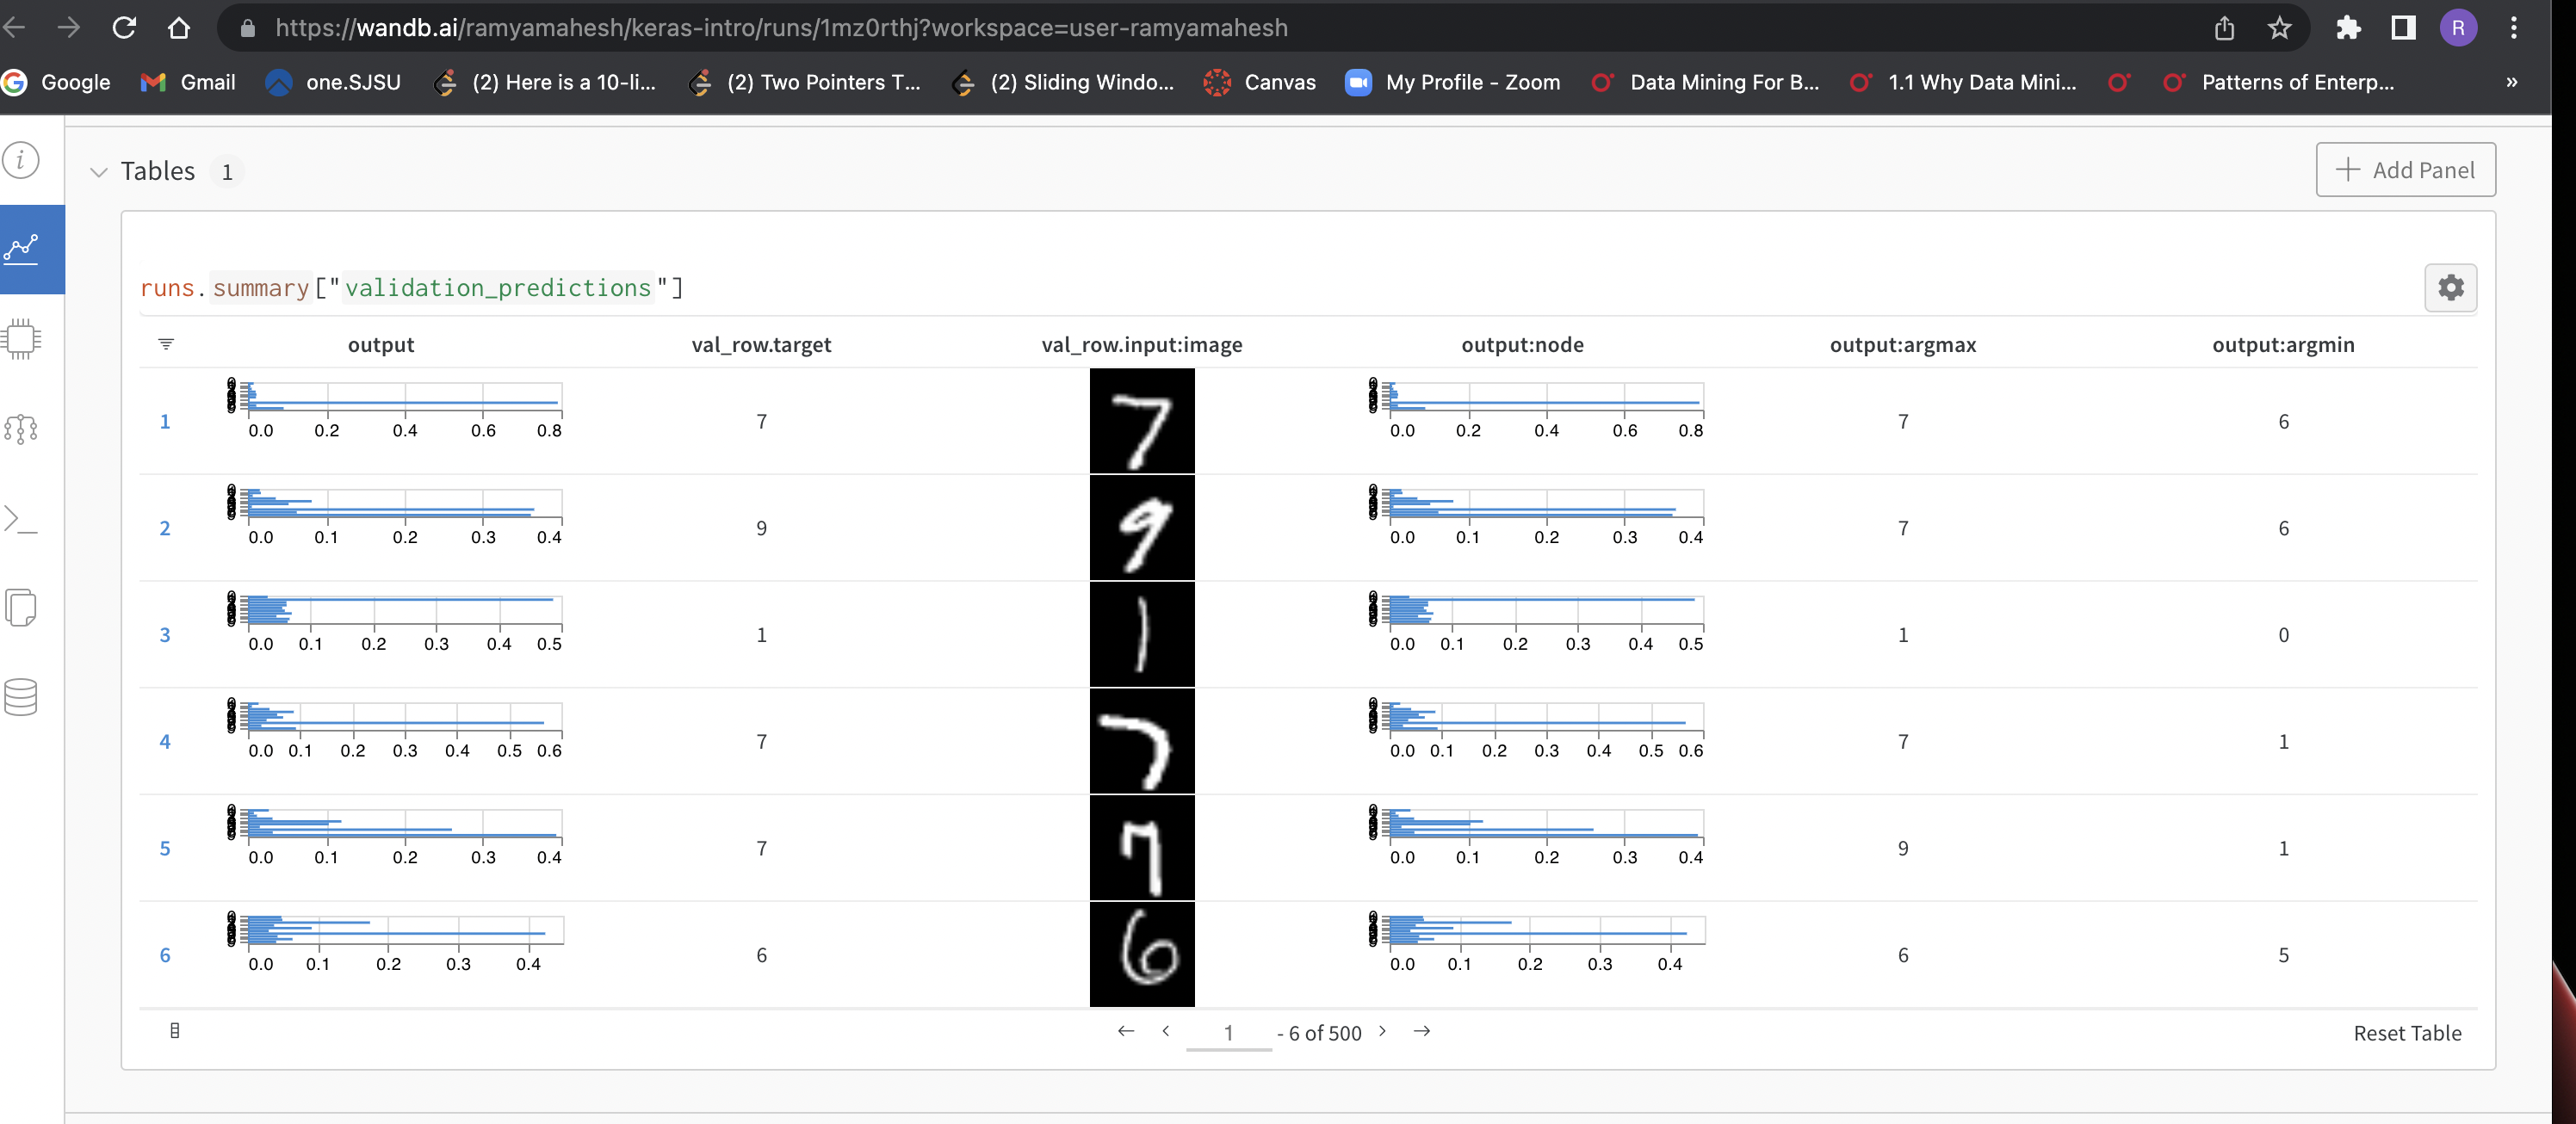

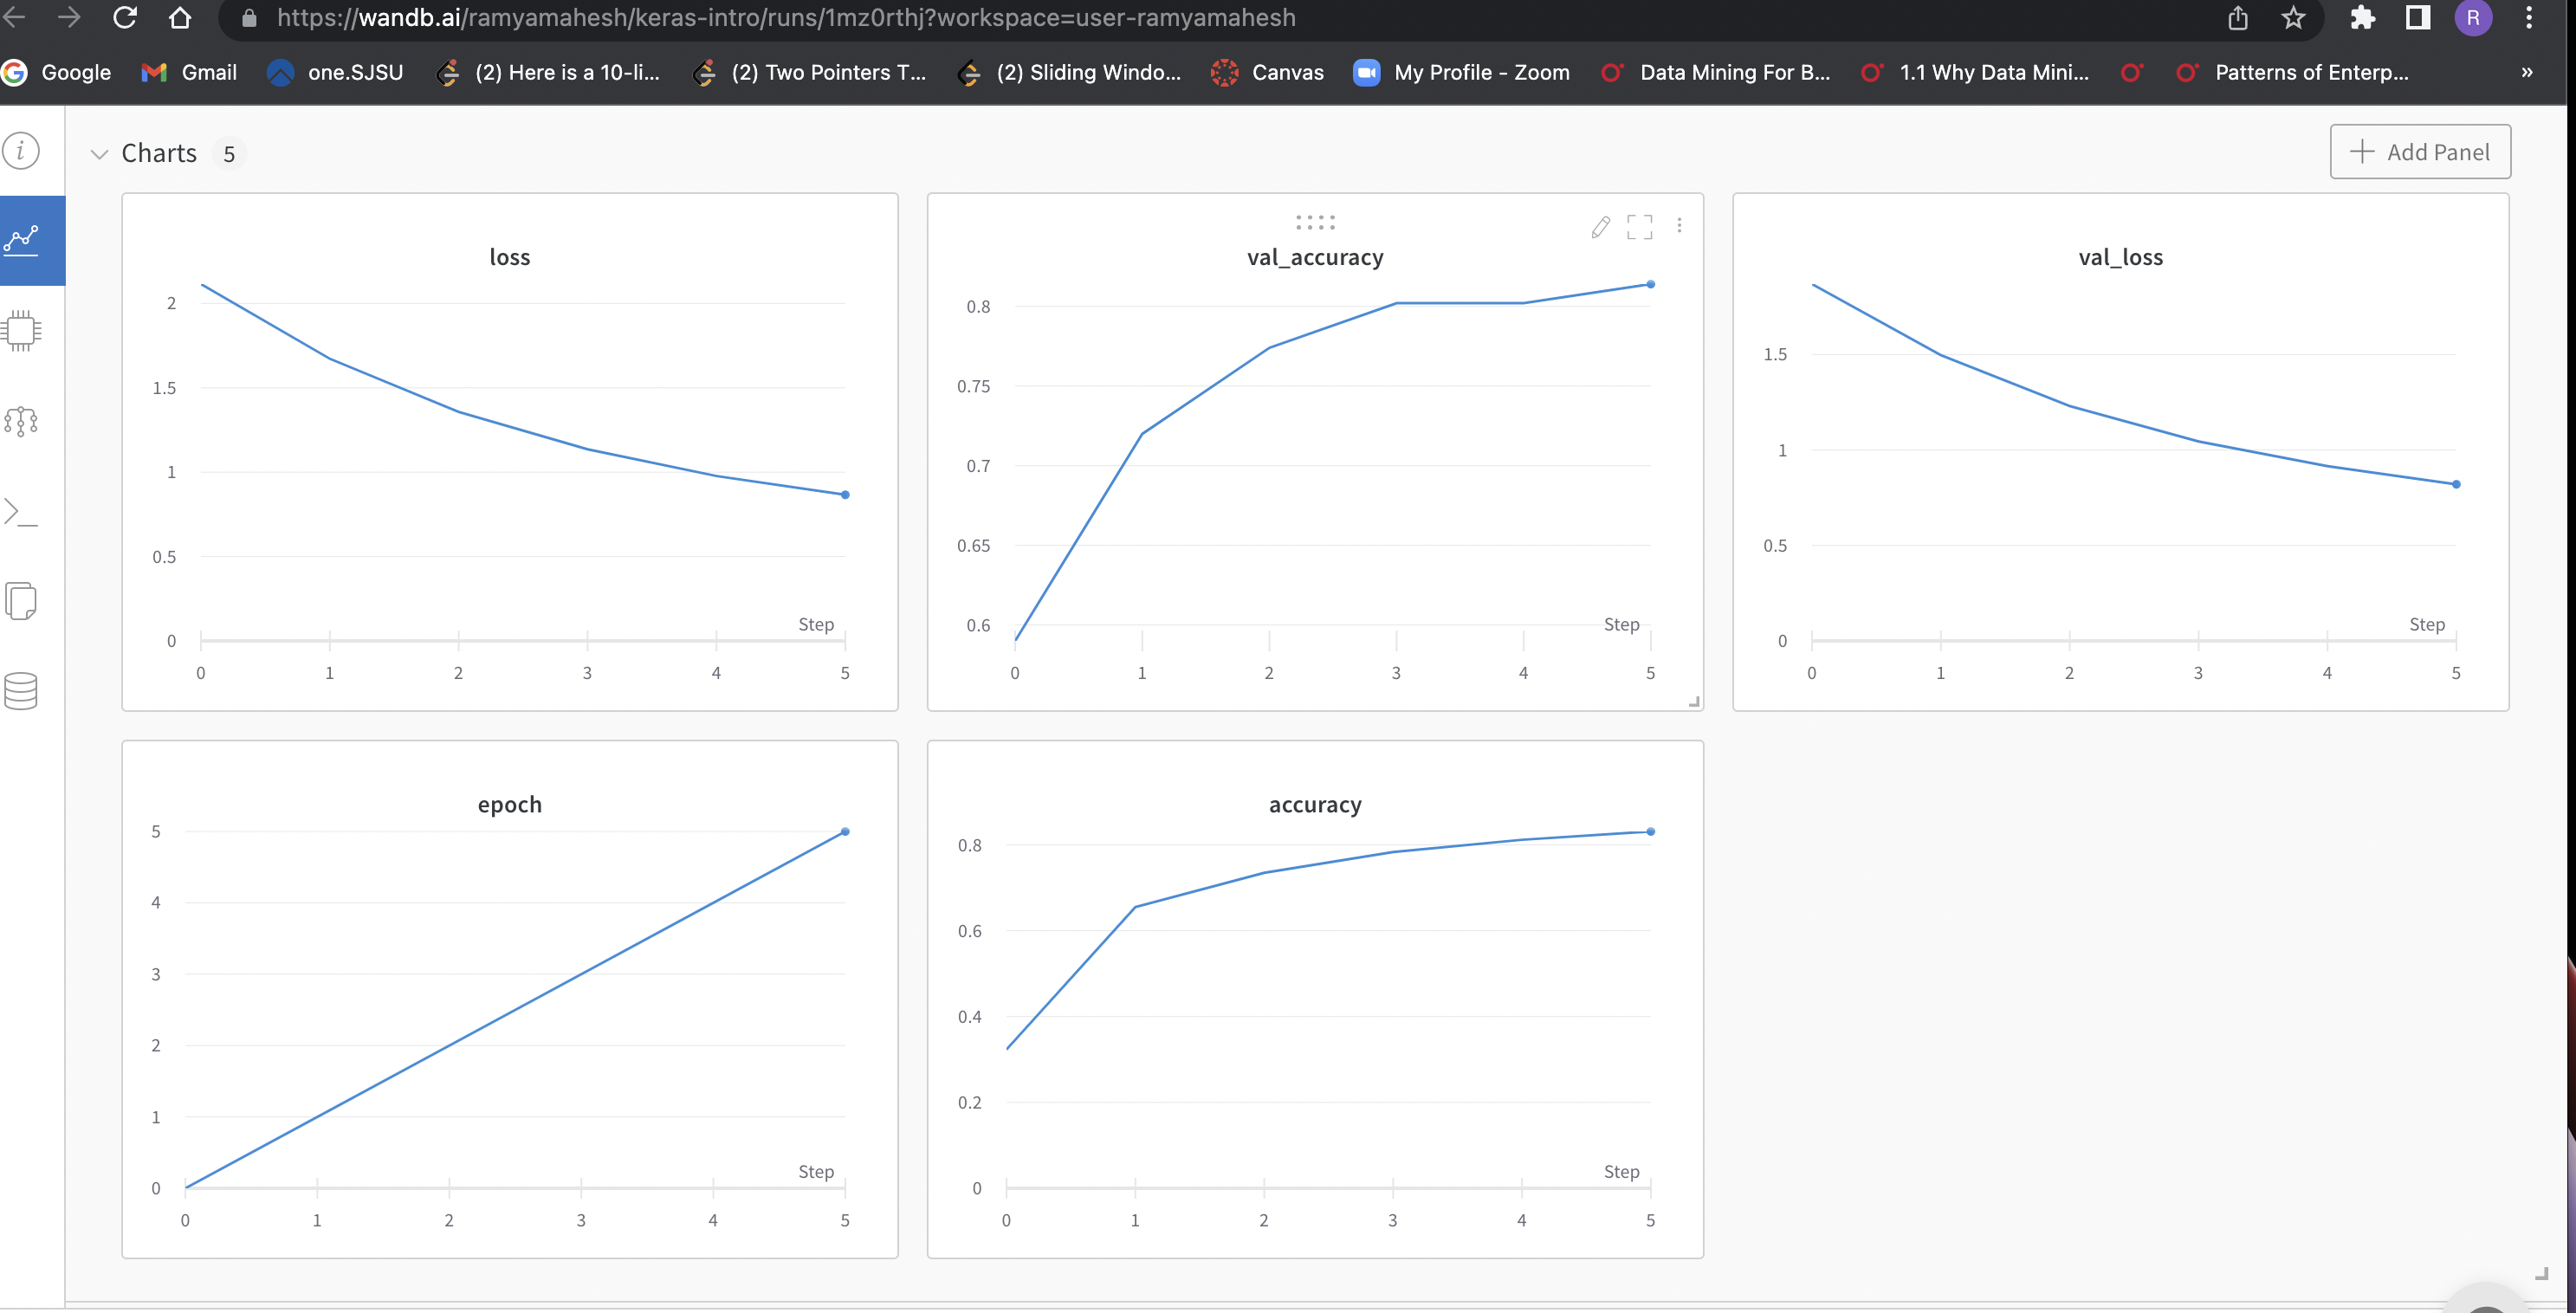